# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT
from tqdm import tqdm
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
import matplotlib.patheffects as path_effects
from matplotlib.ticker import FuncFormatter

In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/swatmf_git/swatmf_pkgs')
from swatmf_viz import read_output_mgt, read_output_hru, read_output_sed, read_output_sub, read_output_rsv, read_output_rch



# Set Path

In [3]:
sed01 = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new"
sed02 = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_bau_new"
sed03 = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd_new"





In [4]:
df01 = read_output_sed(sed01)
df01.rename(columns = {'sed':'01'}, inplace = True)
df02 = read_output_sed(sed02)
df02.rename(columns = {'sed':'02'}, inplace = True)
df03 = read_output_sed(sed03)
df03.rename(columns = {'sed':'03'}, inplace = True)

df03

,subs,mons,03
0,1,1.0,11710.0
1,2,1.0,26190.0
2,3,1.0,65590.0
3,4,1.0,45760.0
4,5,1.0,54610.0
...,...,...,...
56535,253,12.0,0.0
56536,254,12.0,0.0
56537,255,12.0,0.0
56538,256,12.0,0.0


<AxesSubplot:>

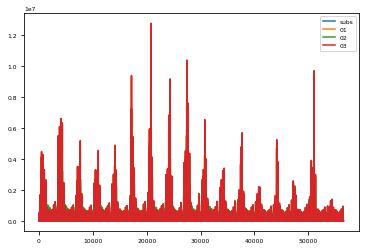

In [5]:
df = pd.concat([df01, df02['02'], df03['03']], axis=1)
df = df.drop('mons', axis=1)
# df = df[['subs', 'base', 'bau', 'rd']]
# df = df.drop(df.columns[0], axis=1)
df.plot()

In [6]:
df

,subs,01,02,03
0,1,11710.0,12900.0,11710.0
1,2,26190.0,27510.0,26190.0
2,3,65590.0,62670.0,65590.0
3,4,45760.0,57750.0,45760.0
4,5,54610.0,54610.0,54610.0
...,...,...,...,...
56535,253,0.0,0.0,0.0
56536,254,0.0,0.0,0.0
56537,255,0.0,0.0,0.0
56538,256,0.0,0.0,0.0


In [19]:
rchs = [112, 137, 147, 222, 225, 240]
d = []
for i in rchs:
    df240 = df[df["subs"] == i]
    df240.index = pd.date_range('1/1/2003', periods=len(df240), freq='M')
    # df240= df240['1/1/2001':]
    # df240.drop(df240.tail(1).index,inplace=True)

    # df240['base'].plot()
    a = df240['03'].groupby(df240.index.year).sum().mean()
    d.append(a)

In [20]:
df240

,subs,01,02,03
2003-01-31,240,109400.0,108600.0,106800.0
2003-02-28,240,190100.0,136900.0,189900.0
2003-03-31,240,242100.0,136300.0,241200.0
2003-04-30,240,193400.0,165100.0,193000.0
2003-05-31,240,188100.0,182000.0,186300.0
...,...,...,...,...
2019-08-31,240,26310.0,23290.0,24090.0
2019-09-30,240,19270.0,17050.0,17560.0
2019-10-31,240,16220.0,15160.0,15110.0
2019-11-30,240,23040.0,19050.0,20390.0


In [21]:
d

[422163.8089318746,
 621395.5470588235,
 10911147.05882353,
 8788.755732335294,
 8611228.235294119,
 1127634.705882353]

<AxesSubplot:>

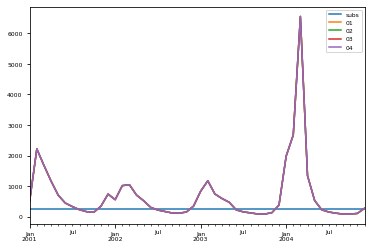

In [46]:
df240.plot()

In [47]:
df240

,subs,01,02,03,04
2001-01-31,240,518.40,518.40,518.40,518.40
2001-02-28,240,2216.00,2216.00,2216.00,2216.00
2001-03-31,240,1676.00,1676.00,1676.00,1676.00
2001-04-30,240,1164.00,1164.00,1164.00,1164.00
2001-05-31,240,700.80,700.80,700.80,700.80
2001-06-30,240,443.50,443.50,443.50,443.50
2001-07-31,240,326.20,326.20,326.20,326.20
2001-08-31,240,224.90,224.90,224.90,224.90
2001-09-30,240,161.00,161.00,161.00,161.00
2001-10-31,240,140.70,140.70,140.70,140.70


8240.4275

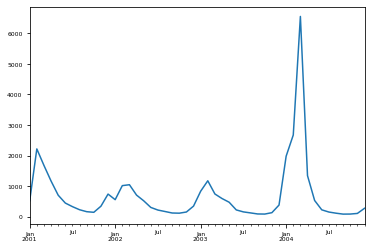

In [49]:
test = read_output_rch(sed04)
test = test[test["subs"] == 240]
test.index = pd.date_range('1/1/2000', periods=len(test), freq='M')
test.drop(test.tail(1).index,inplace=True)

test = test['sed']
test= test['1/1/2001':] 
test.plot()
test.groupby(test.index.year).sum().mean()

In [25]:
mtmp_max = dff137.groupby(dff137.index.year).sum().mean()
mtmp_max

NameError: name 'dff137' is not defined

In [9]:
pts = [112, 137, 147, 240]
pts_nams = ['Cubango', 'Mucundi', 'Cuito', 'Mohembo']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [313]:
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                # return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
                return '{val:d}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    # print (val, signf)
                    if str(val).split(".")[1] == "0":
                    #    return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i])
                        return '{val:d}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

ipykernel_launcher:35: UserWarning: FixedFormatter should only be used together with FixedLocator


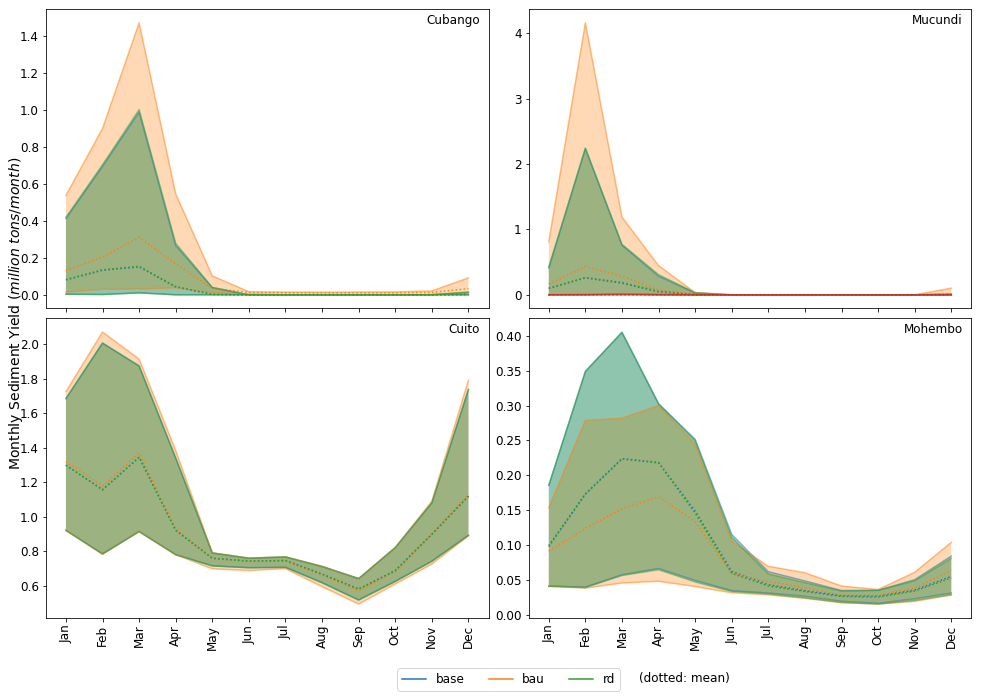

In [25]:
f, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

for ax, p, pn in zip(axes.flat, pts, pts_nams):

    dff = df[df["subs"] == p]
    dff = dff.drop('subs', axis=1)
    # dff = dff.drop('bau', axis=1)
    dff = dff/1e6
    dff.index = pd.date_range('1/1/2003', periods=len(dff), freq='M')
    if pn == 'Mucundi':
        dff['Mucundi'] = df137_sed.values/1e6
    df_min = dff.groupby(dff.index.month).min()
    df_mean = dff.groupby(dff.index.month).mean()
    df_max = dff.groupby(dff.index.month).max()
    ax.text(
        0.98, 0.95, pn,
        fontsize=12, transform=ax.transAxes,
        ha='right', c='k', fontweight='normal',
        )

    for i, j in zip(dff.columns, range(len(dff.columns))):
        ax.plot(df_min.index, df_min[i], color=colors[j], alpha=0.5)
        
        ax.fill_between(df_min.index, df_min[i], df_max[i], alpha=0.3)
        ax.plot(df_min.index, df_max[i], color=colors[j], alpha=0.5)
        ax.plot(df_min.index, df_mean[i], color=colors[j], alpha=1, linestyle='dotted')
        # ax.set_yscale('log')
        # ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
for ax in axes.flat:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(df_min.index[::1])
    ax.tick_params(axis='both', labelsize=12)
lines, labels = fig.axes[0].get_legend_handles_labels()
plt.legend(
    lines, labels, loc = 'lower center', ncol=3,
    bbox_to_anchor=(0.5, -0.13),
    fontsize=12)

ax1.text(
    0.69, -0.105, '(dotted: mean)',
    fontsize=12, transform=ax1.transAxes,
    ha='center', c='k', fontweight='normal',
    )

ax1.set_ylabel('Monthly Sediment Yield $(million\ tons/month)$', fontsize=14)
plt.tight_layout()
# plt.savefig('month_mmm.png', dpi=300, bbox_inches="tight")
plt.show()



                base       bau             rd
111     53650.000000   66070.0   57450.000000
368     42160.000000  180100.0   44370.000000
625     10740.000000  151300.0   11690.000000
882    174700.000000  332500.0  184200.000000
1139     1641.000000   45080.0    1712.000000
...              ...       ...            ...
55366       0.000000       0.0       0.000000
55623       0.000935       0.0       0.000935
55880       0.008299       0.0       0.008295
56137       0.001884       0.0       0.001884
56394      69.840000   13020.0      81.630000

[204 rows x 3 columns]
               base            bau       rd
136    18010.000000   24550.000000  21470.0
393    67260.000000  117300.000000  81570.0
650    14240.000000   29800.000000  23450.0
907    52380.000000   78750.000000  61000.0
1164    3564.000000    7058.000000   4733.0
...             ...            ...      ...
55391      0.000436       0.361400    175.4
55648      0.000179       0.000000    288.8
55905      0.019360       0.

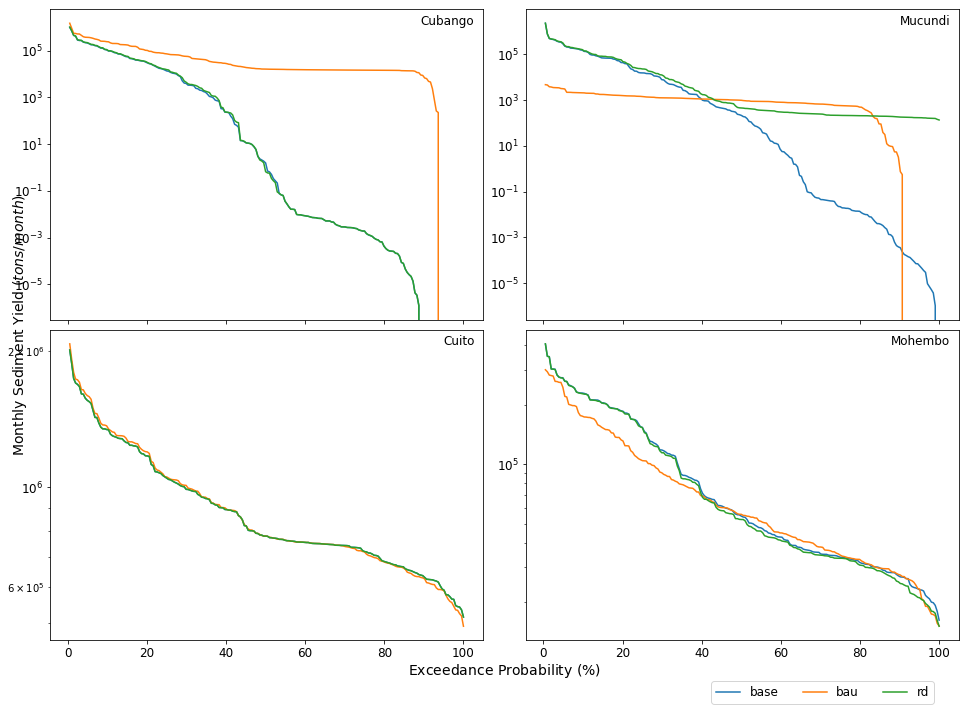

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharex=True)
ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for ax, p, pn in zip(axes.flat, pts, pts_nams):
    dff = df[df["subs"] == p]
    dff = dff.drop('subs', axis=1)
    print(dff)
    if pn == 'Mucundi':
        dff['bau'] = df137_sed.values
    ax.text(
        0.98, 0.95, pn,
        fontsize=12, transform=ax.transAxes,
        ha='right', c='k', fontweight='normal',
        )
    for i in dff.columns:
        sort = np.sort(dff[i])[::-1]
        exceedence = np.arange(1.,len(sort)+1) / len(sort)
        ax.plot(exceedence*100, sort, label=i)
        ax.set_yscale('log')
        ax.tick_params(axis='both', labelsize=12)
        ax.tick_params(axis='both', which='minor', labelsize=10)

# axes[1,0].set_ylim(100000, 10000000)
lines, labels = fig.axes[0].get_legend_handles_labels()
plt.legend(
    lines, labels, loc = 'lower center', ncol=3,
    bbox_to_anchor=(0.85, -0.11),
    fontsize=12)
ax1.set_ylabel('Monthly Sediment Yield $(tons/month)$', fontsize=14)
ax1.set_xlabel('Exceedance Probability $(\%)$', fontsize=14, labelpad=10)
plt.tight_layout()
# plt.savefig('month_fdc.png', dpi=300, bbox_inches="tight")
plt.show()

In [245]:
dff

,subs,base,bau,rd
136,137,18010.000000,24550.000000,21470.0
393,137,67260.000000,117300.000000,81570.0
650,137,14240.000000,29800.000000,23450.0
907,137,52380.000000,78750.000000,61000.0
1164,137,3564.000000,7058.000000,4733.0
...,...,...,...,...
55391,137,0.000436,0.361400,175.4
55648,137,0.000179,0.000000,288.8
55905,137,0.019360,0.006822,282.0
56162,137,0.017500,0.011350,186.3


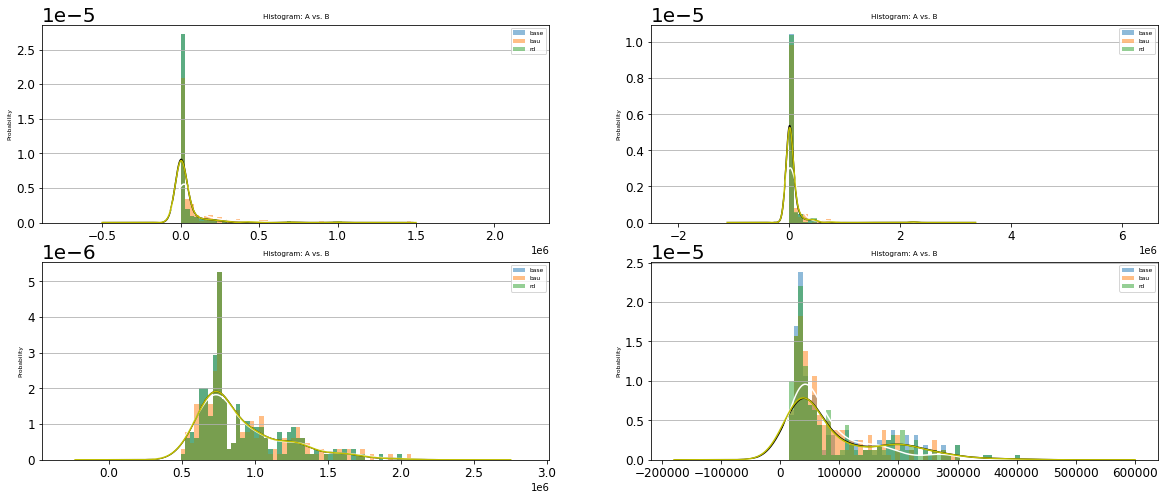

In [261]:
# fig, ax = plt.subplots(figsize=(16,8),)

fig, axes = plt.subplots(2, 2, figsize=(20,8))
for ax, p in zip(axes.flat, pts):
    dff = df[df["subs"] == p]
    dff = dff.drop('subs', axis=1)


    dff[['base', 'bau', 'rd']].plot.kde(ax=ax, legend=False, title='Histogram: A vs. B', color=['k', 'w', 'y'])
    dff[['base', 'bau', 'rd']].plot.hist(
                            density=True,
                            ax=ax,
                            bins=50,
                            alpha=0.5
                            )
    ax.set_ylabel('Probability')
    ax.grid(axis='y')
    ax.tick_params(axis='both', labelsize=12)
    # ax.set_xlim(-100000,500000)
    # ax.set_facecolor('#d8dcd6')
plt.show()

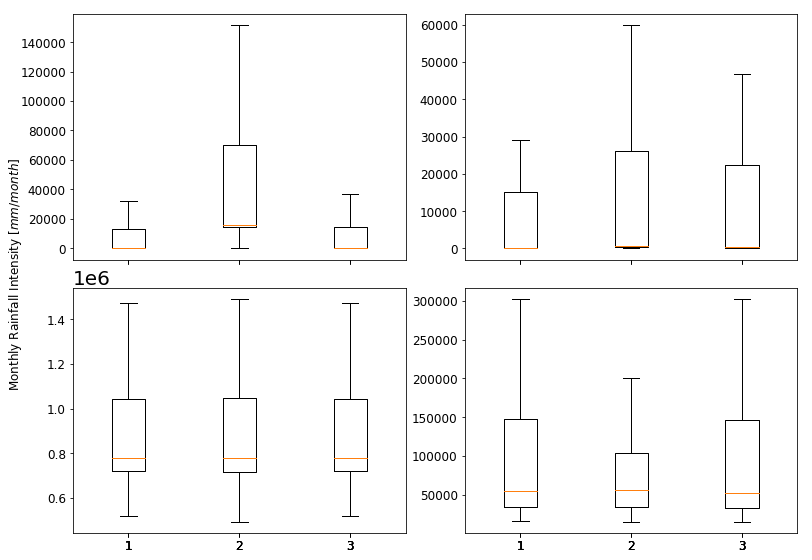

In [257]:
# Boxplot
f, axes = plt.subplots(2, 2, figsize=(12,8), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for ax, p in zip(axes.flat, pts):
    dff = df[df["subs"] == p]
    dff = dff.drop('subs', axis=1)
    ax.boxplot(dff.values, flierprops=flierprops, showfliers=False)
    # ax.set_xticks([i+1 for i in range(9)])
    # ax.set_xticklabels(dff.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    # ax.set_title(
    #     month_names[i],
    #     horizontalalignment='left',
    #     x=0.02,
    #     y=0.85,
    # )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12, labelpad=10)
plt.tight_layout()
# plt.savefig(os.path.join(working_path, 'okvg_gcms_mon03.png'), dpi=300, bbox_inches="tight")
plt.show()

# Barchart

In [32]:
from swatmf_pkgs.swatmf_viz import y_fmt

In [39]:
df

,subs,base,bau,rd
0,1,11710.0,12900.0,11710.0
1,2,26190.0,27510.0,26190.0
2,3,65590.0,62670.0,65590.0
3,4,45760.0,57750.0,45760.0
4,5,54610.0,54610.0,54610.0
...,...,...,...,...
56535,253,0.0,0.0,0.0
56536,254,0.0,0.0,0.0
56537,255,0.0,0.0,0.0
56538,256,0.0,0.0,0.0


In [48]:
df137m =df137_sed.groupby(df137_sed.index.month).mean()
df137m

1     1284.547059
2      992.629412
3     1772.523529
4     1992.547059
5      707.796471
6      532.259176
7      614.023324
8      704.158824
9      798.364706
10     956.700000
11    1090.117647
12    1242.255706
Name: sed, dtype: float64

In [233]:
subid = 157
dff = df[df["subs"] == subid]
ds = dff.drop('subs', axis=1)
ds.index = pd.date_range('1/1/2003', periods=len(ds), freq='M')
ds = ds.groupby(ds.index.month).mean()
if subid == 137:
    ds['bau'] =df137m.values
ds = ds/1e3

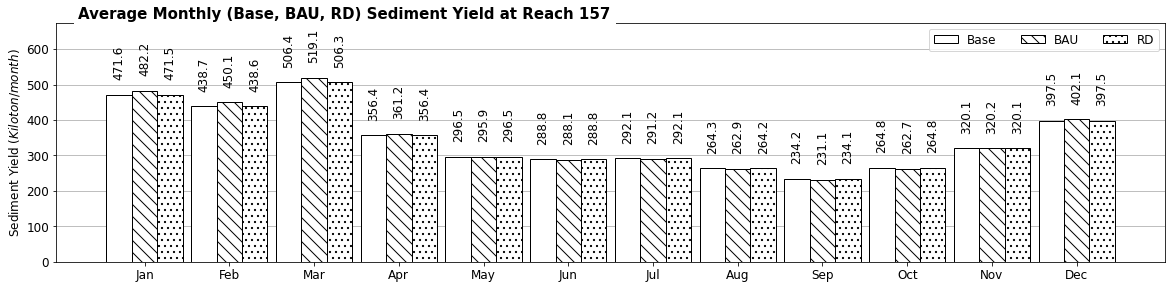

In [234]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(16,4)
                )
# x = date2num(base_df.index)
w = 0.3
ax.bar(ds.index-0.3, ds.base, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(ds.index, ds.bau, width=w, align='center', label='BAU', hatch='\\\\', color='white', edgecolor='black', zorder=3)
ax.bar(ds.index+0.3, ds.rd, width=w, align='center', label='RD', hatch='..', color='white', edgecolor='black', zorder=3)

for index, value in zip(ds.index-0.2, ds.base):
    ax.text(
        index-0.1, value+50, '{:3.1f}'.format(value),
        fontsize=12, rotation=90, horizontalalignment='center')
for index, value in zip(ds.index, ds.bau):
    ax.text(index, value+50, '{:3.1f}'.format(value), fontsize=12, rotation=90, ha='center')
for index, value in zip(ds.index, ds.rd):
    ax.text(index+0.3, value+50, '{:3.1f}'.format(value), fontsize=12, rotation=90, ha='center')


# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))


ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(base_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(ds.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    # 'Average Monthly (Base, BAU, RD) Streamflow at Mucundi (Subbasin 137)', # streamflow
    'Average Monthly (Base, BAU, RD) Sediment Yield at Reach {}'.format(subid), #sed
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.99,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12, ncol=3)
ax.grid(axis='y', zorder=0)
ax.margins(y=0.3)
ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
plt.savefig('sub{}_sed.png'.format(subid), dpi=300, bbox_inches="tight")
plt.show()

In [235]:
df

,subs,base,bau,rd
0,1,11710.0,12900.0,11710.0
1,2,26190.0,27510.0,26190.0
2,3,65590.0,62670.0,65590.0
3,4,45760.0,57750.0,45760.0
4,5,54610.0,54610.0,54610.0
...,...,...,...,...
56535,253,0.0,0.0,0.0
56536,254,0.0,0.0,0.0
56537,255,0.0,0.0,0.0
56538,256,0.0,0.0,0.0


In [250]:
dff = df[df["subs"] == 137]

In [251]:
ds = dff.drop('subs', axis=1)
ds.index = pd.date_range('1/1/2003', periods=len(ds), freq='M')

In [252]:
dsy = ds.groupby(ds.index.year).sum()

In [253]:
dsy

,base,bau,rd
2003,1.582468e+05,2.665096e+05,197708.8
2004,5.601090e+05,1.083448e+06,623139.6
2005,1.293855e+05,2.248946e+05,171036.8
2006,3.955798e+05,6.219762e+05,427497.1
2007,2.513626e+05,4.386254e+05,287020.2
2008,2.469607e+06,4.596074e+06,2492204.3
2009,1.372581e+06,2.094293e+06,1407812.6
2010,1.335558e+06,2.130208e+06,1386505.0
2011,8.551190e+05,1.317351e+06,909073.4
2012,5.281711e+05,9.620481e+05,557771.0


# Total

In [ ]:
ds

In [ ]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(8,6)
                )

_X = np.arange(len(asbase.index))


ax.bar(_X-0.3, asbase, 0.3, label='Baseline', hatch='', color='white', edgecolor='black')
ax.bar(_X, asbau_df, 0.3, label='BAU', hatch='\\', color='white', edgecolor='black')
ax.bar(_X+0.3, asrd_df, 0.3, label='RD', hatch='.', color='white', edgecolor='black')

plt.xticks(_X, ['Mucundi (sub 137)', 'Mohembo (sub 240)']) # set labels manually
# x = date2num(df_base_as.index)
# w = 100
# ax.bar(x-50, df_base_as_.sub_240, width=w, align='center', label='Base')
# ax.bar(x+50, scn_df_as_.str_sim, width=w, align='center', label='BAU')
for index, value in zip(_X-0.35, asbase):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
for index, value in zip(_X-0.05, asbau_df):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
for index, value in zip(_X+0.25, asrd_df):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.tick_params(axis='both', labelsize=12)
# # plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(x[::1])
# ax.xaxis_date()
# # plt.xticks[1].set_visible(False)

ax.margins(y=0.3)
ax.set_title(
    # 'Average Annual Total (Base and BAU) Sediment Yield',
    'Average Annual Total (Base and BAU) Stream Discharge',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.05,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
# ax.text(-0.005, 1.01, '1e6', fontsize=8, transform=ax.transAxes)
plt.tight_layout()
ax.legend(fontsize=12, loc='upper left')
# ax.grid(axis='y')
ax.set_ylabel(r'Stream Discharge million $(m^3/year)$', fontsize = 12)
# ax.set_ylabel(r'Sediment Yield $(Kiloton/year)$', fontsize = 12)
plt.savefig('aat_okvg_2.png', dpi=300, bbox_inches="tight")
plt.show()